In [26]:
import numpy as np

import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.interpolate import CubicSpline


In [4]:
SF_glad = sio.loadmat('../../data/SF_GLAD_deep_500m.mat')

In [81]:
r = SF_glad['dist_axis'][0,:]
yll = SF_glad['SF2ll'][0,:]
ytt = SF_glad['SF2tt'][0,:]

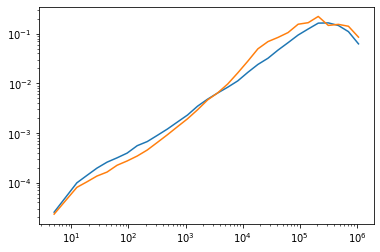

In [82]:
plt.plot(r, yll)
plt.plot(r, ytt)

plt.xscale('log')
plt.yscale('log')

### Polynomial fitting 

In [96]:
# Fit polynomial ln (f) = g_poly (ln(r))
poly3_ll = np.polyfit(np.log(r), np.log(yll), 6)
pf_ll = np.poly1d(poly3_ll)

pdf_ll = np.poly1d(pf_ll.deriv())
pddf_ll = np.poly1d(pdf_ll.deriv())

In [84]:
f_fit = np.exp(pf_ll(np.log(r)))

In [97]:
dg = pdf_ll(np.log(r))
ddg = pddf_ll(np.log(r))

df_fit = f_fit/r*dg # f' = f/r*g'

ddf_fit = df_fit*dg/r + f_fit/r**2 * (ddg - dg)# f'' = f'g'/r + f/r^2*(g'' - g')

In [99]:
Vr = -r*ddf_fit + df_fit

In [114]:
def sig_function(r, y): 
    # Fit a polynomial to the estimate of the SF2
    # Then estimate the signature functions
    
    # Fit polynomial ln (f) = g_poly (ln(r))
    poly3_ll = np.polyfit(np.log(r), np.log(y), 4)
    pf_ll = np.poly1d(poly3_ll)

    pdf_ll = np.poly1d(pf_ll.deriv())
    pddf_ll = np.poly1d(pdf_ll.deriv())
    
    f_fit = np.exp(pf_ll(np.log(r)))
    dg = pdf_ll(np.log(r))
    ddg = pddf_ll(np.log(r))

    df_fit = f_fit/r*dg # f' = f/r*g'
    ddf_fit = df_fit*dg/r + f_fit/r**2 * (ddg - dg)# f'' = f'g'/r + f/r^2*(g'' - g')
    
    Vr = -r*ddf_fit + df_fit
    
    return Vr, f_fit

In [115]:
V_ll, fll_fit = sig_function(r, yll)
V_tt, ftt_fit = sig_function(r, ytt)

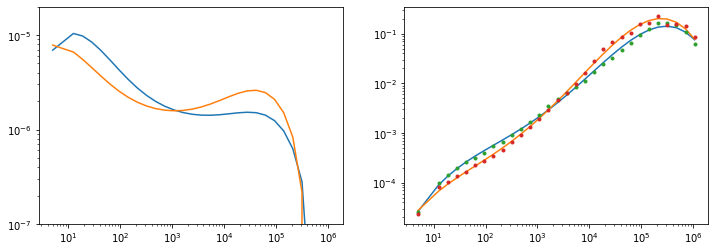

In [118]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(r, V_ll)
plt.plot(r, V_tt)
plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-7, 2e-5])

plt.subplot(122)
plt.plot(r, fll_fit)
plt.plot(r, ftt_fit)
plt.plot(r, yll, '.')
plt.plot(r, ytt, '.')
plt.xscale('log')
plt.yscale('log')


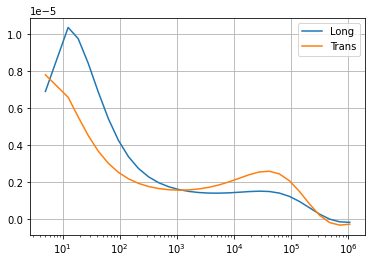

In [121]:
plt.plot(r, V_ll, label='Long')
plt.plot(r, V_tt, label='Trans')
plt.xscale('log')
#plt.yscale('log')

plt.grid()
plt.legend()

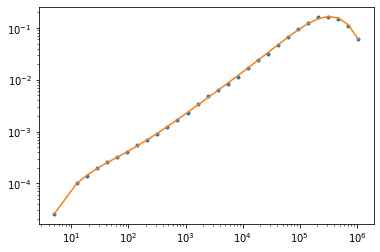

In [86]:
plt.plot(r, yll, '.')
plt.plot(r, f_fit)

plt.xscale('log')
plt.yscale('log')

#### Scraps 

Originally tried to fit cubic splines, but the result was too noisy. 

In [64]:
cs_ll = CubicSpline(x,yll)
cs_tt = CubicSpline(x,ytt)

In [71]:
poly3_ll = np.polyfit(np.log(x), np.log(yll), 6)
pf_ll = np.poly1d(poly3_ll)

poly3_tt = np.polyfit(np.log(x), np.log(ytt), 6)
pf_tt = np.poly1d(poly3_tt)

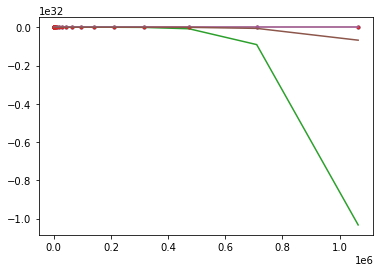

In [72]:
plt.plot(x, yll, '.')
plt.plot(x, cs_ll(x))
plt.plot(x, pf_ll(x))

plt.plot(x, ytt, '.')
plt.plot(x, cs_tt(x))
plt.plot(x, pf_tt(x))


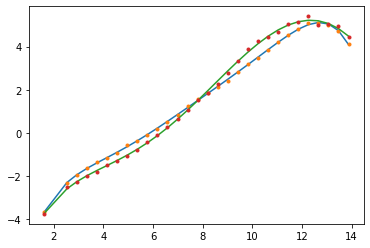

In [73]:
plt.plot(np.log(x), pf_ll(np.log(x)))
plt.plot(np.log(x), np.log(yll), '.')

plt.plot(np.log(x), pf_tt(np.log(x)))
plt.plot(np.log(x), np.log(ytt), '.')


In [74]:
pf_ll.deriv()

poly1d([-4.24078382e-04,  1.59246520e-02, -2.32433687e-01,  1.63698632e+00,
       -5.48183944e+00,  7.56884343e+00])

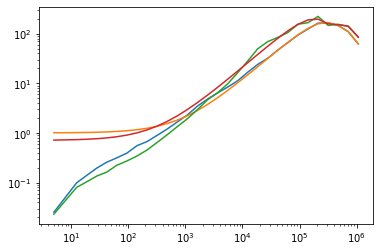

In [67]:
plt.plot(x, cs_ll(x))
plt.plot(x, (pf_ll(x)))


plt.plot(x, cs_tt(x))
plt.plot(x, pf_tt(x))


plt.xscale('log')
plt.yscale('log')

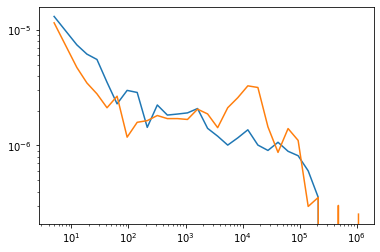

In [34]:
plt.plot(x, cs_ll(x,1))
plt.plot(x, cs_tt(x,1))

plt.xscale('log')
plt.yscale('log')

In [36]:
Vll = -x* cs_ll(x,2) + cs_ll(x,1)
Vtt = -x* cs_tt(x,2) + cs_tt(x,1)


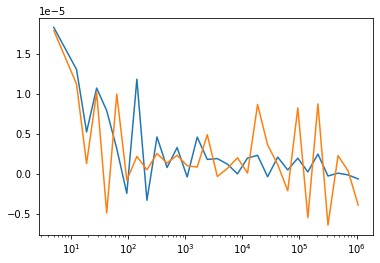

In [39]:
plt.plot(x, Vll)
plt.plot(x, Vtt)

plt.xscale('log')
#plt.yscale('log')